# Lung Cancer sequences analysis - SANKEY PATTERNS
--------------------------------------------------------------------------------


Author: Belén Otero Carrasco

Last updated 11 April 2024

--------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene
import mysql.connector
import re

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
## dividir el script por los diferentes pasos que hay que seguir

# Patterns found in treatment lung cancer

In [54]:
pat_iden_5 = pd.read_csv(("patronesIdenticos5_treat.csv"),sep= ",")

In [55]:
pat_iden_5

Patron Proteina Posiciones  \
0     AVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDI...   Q13547      [131]   
1     AVNWAGGLHHAKKSEASGFCYVNDIVLAILELLKYHQRVLYIDIDI...   Q92769      [132]   
2     WLEAVIFLIGIIVANVPEGLLATVTVCLTLTAKRMARKNCLVKNLE...   P05023      [316]   
3     WLEAVIFLIGIIVANVPEGLLATVTVCLTLTAKRMARKNCLVKNLE...   P50993      [314]   
4     SMIDPPRAAVPDAVGKCRSAGIKVIMVTGDHPITAKAIAKGVGIIS...   P05023      [589]   
...                                                 ...      ...        ...   
9858                                                YYS   P37231      [114]   
9859                                                YYS   P42345     [1774]   
9860                                                YYS   P42574      [202]   
9861                                                YYV   P20618      [131]   
9862                                                YYV   P28074      [170]   

                                            classesProt  
0     ['hydrolase', 'nucleic acid binding', 'oxidore...  
1     ['hydrolase', 'nucleic acid binding', 'oxidore...  
2                          ['hydrolase', 'transporter']  
3                          ['hydrolase', 'transporter']  
4                          ['hydrolase', 'transporter']  
...                                                 ...  
9858  ['nucleic acid binding', 'receptor', 'transcri...  
9859  ['kinase', 'nucleic acid binding', 'transferase']  
9860  ['enzyme modulator', 'hydrolase', 'protease', ...  
9861                          ['hydrolase', 'protease']  
9862                          ['hydrolase', 'protease']  

[9863 rows x 4 columns]

In [56]:
len(pat_iden_5["Patron"].unique())

4170

In [57]:
len(pat_iden_5["Proteina"].unique())

52

In [58]:
pat_iden_5['Len_pattern'] = pat_iden_5['Patron'].apply(lambda x: len(x))

In [59]:
pat_iden_5['Len_pattern'].describe()

count    9863.000000
mean        3.912805
std         3.246529
min         3.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        94.000000
Name: Len_pattern, dtype: float64

In [60]:
pat_iden_5['Len_pattern'].value_counts()

Len_pattern
3     4924
4     4101
5      494
6       78
7       38
10      30
8       26
9       24
14      18
11      16
13      12
15      12
18      10
12       8
16       8
20       6
33       6
23       4
48       4
40       4
25       2
24       2
62       2
54       2
50       2
47       2
39       2
35       2
32       2
31       2
30       2
29       2
28       2
17       2
27       2
19       2
26       2
22       2
88       2
94       2
Name: count, dtype: int64

In [61]:
pat_iden_5.groupby('Patron').size().sort_values(ascending=False)

Patron
AEA     9
YLN     7
DSK     7
VSV     7
SNL     7
       ..
ILGY    2
ILH     2
ILIL    2
ILKK    2
YYV     2
Length: 4170, dtype: int64

In [62]:
pat_iden_5["Patron"].describe()

count     9863
unique    4170
top        AEA
freq         9
Name: Patron, dtype: object

In [63]:
pat_iden_5.groupby('Proteina')['Patron'].count().sort_values(ascending=False)

Proteina
P42345    955
P22102    403
Q99460    374
P23921    351
Q99835    308
P31939    266
P11387    263
Q16881    256
P35354    243
P51649    242
P10696    239
P23219    234
P37231    212
P50993    212
Q969P6    202
P05091    200
Q9UGI9    197
Q99808    195
Q96SW2    193
P10276    192
P29466    189
P01106    188
P62508    184
P14324    181
P05023    178
O75469    175
Q71U36    174
P04637    167
P05121    165
P11474    158
O15379    153
P05412    151
P04818    145
Q9H4B7    140
Q04828    140
P07437    131
P24385    128
P28702    126
P42574    116
P20618    115
P28074    115
P12004    114
P48443    110
P19793    103
P01375     97
P10415     95
Q92769     84
P30085     82
Q13547     80
P00374     72
P62942     40
P54710     30
Name: Patron, dtype: int64

In [64]:
metrics_005 = pat_iden_5.groupby('Proteina')['Patron'].count().sort_values(ascending=False)

In [65]:
metrics_005.describe()

count     52.000000
mean     189.673077
std      133.308535
min       30.000000
25%      115.750000
50%      174.500000
75%      212.000000
max      955.000000
Name: Patron, dtype: float64

In [66]:
pat_iden_5_len4 = pat_iden_5[pat_iden_5["Len_pattern"]>= 4]

In [67]:
pat_iden_5_len4 = pat_iden_5_len4.drop_duplicates()

In [68]:
len(pat_iden_5_len4["Patron"].unique())

2368

In [69]:
pat_iden_5_bis = pd.read_csv(("patronesIdenticos5Treat.csv"),sep= ",")

In [70]:
pat_iden_5_bis['Len_pattern'] = pat_iden_5_bis['Patron'].apply(lambda x: len(x))

In [71]:
check_coin_prot = pat_iden_5_bis[pat_iden_5_bis["Len_pattern"]>10]

In [132]:
# Obtener valores únicos de la columna "Patron"
valores_unicos_patron = pat_iden_5_bis["Patron"].unique()

# Inicializar contadores para valores iguales y diferentes
iguales_count = 0
diferentes_count = 0

# Iterar sobre cada valor único en la columna "Patron"
for p in valores_unicos_patron:
    # Obtener subconjunto del DataFrame donde el valor en la columna "Patron" coincide con el valor actual de la iteración
    subset = pat_iden_5_bis[pat_iden_5_bis["Patron"] == p]
    
    # Verificar si los valores en la columna "classesProt" son iguales para este subconjunto
    if subset["classesProt"].nunique() == 1:
        iguales_count += 1
    else:
        diferentes_count += 1

# Calcular porcentaje de valores iguales y diferentes
total_patrones = len(valores_unicos_patron)
porcentaje_iguales = (iguales_count / total_patrones) * 100
porcentaje_diferentes = (diferentes_count / total_patrones) * 100

# Mostrar resultados
print(f"Porcentaje de patrones con valores iguales en 'classesProt': {porcentaje_iguales:.2f}%")
print(f"Porcentaje de patrones con valores diferentes en 'classesProt': {porcentaje_diferentes:.2f}%")


Porcentaje de patrones con valores iguales en 'classesProt': 10.36%
Porcentaje de patrones con valores diferentes en 'classesProt': 89.64%


In [140]:
# Obtener valores únicos de la columna "Patron"
valores_unicos_patron = check_coin_prot["Patron"].unique()

# Inicializar contadores para valores iguales y diferentes
iguales_count = 0
diferentes_count = 0

# Iterar sobre cada valor único en la columna "Patron"
for p in valores_unicos_patron:
    # Obtener subconjunto del DataFrame donde el valor en la columna "Patron" coincide con el valor actual de la iteración
    subset = check_coin_prot[check_coin_prot["Patron"] == p]
    
    # Verificar si los valores en la columna "classesProt" son iguales para este subconjunto
    if subset["classesProt"].nunique() == 1:
        iguales_count += 1
    else:
        diferentes_count += 1

# Calcular porcentaje de valores iguales y diferentes
total_patrones = len(valores_unicos_patron)
porcentaje_iguales = (iguales_count / total_patrones) * 100
porcentaje_diferentes = (diferentes_count / total_patrones) * 100

# Mostrar resultados
print(f"Porcentaje de patrones con valores iguales en 'classesProt': {porcentaje_iguales:.2f}%")
print(f"Porcentaje de patrones con valores diferentes en 'classesProt': {porcentaje_diferentes:.2f}%")

Porcentaje de patrones con valores iguales en 'classesProt': 100.00%
Porcentaje de patrones con valores diferentes en 'classesProt': 0.00%


In [ ]:
# how many in diseases

In [ ]:
# how many in other cancers

In [72]:
pat_iden_10 = pd.read_csv(("patronesIdenticos10_treat.csv"),sep= ",")

In [73]:
pat_iden_10

Patron Proteina Posiciones  \
0      CEGCKGFF   O75469       [57]   
1      CEGCKGFF   P10276      [104]   
2      CEGCKGFF   P19793      [151]   
3      CEGCKGFF   P28702      [221]   
4      CEGCKGFF   P37231      [155]   
...         ...      ...        ...   
14325        YM   Q71U36      [311]   
14326        YM   Q92769      [358]   
14327        YM   Q99460      [204]   
14328        YM   Q99835      [129]   
14329        YM   Q9UGI9      [183]   

                                             classesProt  
0      ['nucleic acid binding', 'receptor', 'transcri...  
1      ['nucleic acid binding', 'receptor', 'transcri...  
2      ['nucleic acid binding', 'receptor', 'transcri...  
3      ['nucleic acid binding', 'receptor', 'transcri...  
4      ['nucleic acid binding', 'receptor', 'transcri...  
...                                                  ...  
14325                           ['cytoskeletal protein']  
14326  ['hydrolase', 'nucleic acid binding', 'oxidore...  
14327                               ['enzyme modulator']  
14328  ['enzyme modulator', 'receptor', 'signaling mo...  
14329                               ['enzyme modulator']  

[14330 rows x 4 columns]

In [74]:
len(pat_iden_10["Patron"].unique())

2034

In [75]:
len(pat_iden_10["Proteina"].unique())

52

In [76]:
pat_iden_10['Len_pattern'] = pat_iden_10['Patron'].apply(lambda x: len(x))

In [77]:
pat_iden_10

Patron Proteina Posiciones  \
0      CEGCKGFF   O75469       [57]   
1      CEGCKGFF   P10276      [104]   
2      CEGCKGFF   P19793      [151]   
3      CEGCKGFF   P28702      [221]   
4      CEGCKGFF   P37231      [155]   
...         ...      ...        ...   
14325        YM   Q71U36      [311]   
14326        YM   Q92769      [358]   
14327        YM   Q99460      [204]   
14328        YM   Q99835      [129]   
14329        YM   Q9UGI9      [183]   

                                             classesProt  Len_pattern  
0      ['nucleic acid binding', 'receptor', 'transcri...            8  
1      ['nucleic acid binding', 'receptor', 'transcri...            8  
2      ['nucleic acid binding', 'receptor', 'transcri...            8  
3      ['nucleic acid binding', 'receptor', 'transcri...            8  
4      ['nucleic acid binding', 'receptor', 'transcri...            8  
...                                                  ...          ...  
14325                           ['cytoskeletal protein']            2  
14326  ['hydrolase', 'nucleic acid binding', 'oxidore...            2  
14327                               ['enzyme modulator']            2  
14328  ['enzyme modulator', 'receptor', 'signaling mo...            2  
14329                               ['enzyme modulator']            2  

[14330 rows x 5 columns]

In [78]:
pat_iden_10.groupby('Patron').size().sort_values(ascending=False)

Patron
HA     21
FM     21
MN     20
TC     18
GW     18
       ..
EVT     5
EVS     5
PRG     5
PRR     5
YYD     5
Length: 2034, dtype: int64

In [79]:
pat_iden_10["Patron"].describe()

count     14330
unique     2034
top          HA
freq         21
Name: Patron, dtype: object

In [80]:
pat_iden_10_len4 = pat_iden_10[pat_iden_10["Len_pattern"]>= 4]

In [81]:
pat_iden_10_len4 = pat_iden_10_len4.drop_duplicates()

In [82]:
len(pat_iden_10_len4["Patron"].unique())

47

In [83]:
pat_iden_10_len4

Patron Proteina Posiciones  \
0    CEGCKGFF   O75469       [57]   
1    CEGCKGFF   P10276      [104]   
2    CEGCKGFF   P19793      [151]   
3    CEGCKGFF   P28702      [221]   
4    CEGCKGFF   P37231      [155]   
..        ...      ...        ...   
245      WTYE   O15379      [306]   
246      WTYE   P05023      [905]   
247      WTYE   P50993      [902]   
248      WTYE   Q13547      [311]   
249      WTYE   Q92769      [312]   

                                           classesProt  Len_pattern  
0    ['nucleic acid binding', 'receptor', 'transcri...            8  
1    ['nucleic acid binding', 'receptor', 'transcri...            8  
2    ['nucleic acid binding', 'receptor', 'transcri...            8  
3    ['nucleic acid binding', 'receptor', 'transcri...            8  
4    ['nucleic acid binding', 'receptor', 'transcri...            8  
..                                                 ...          ...  
245  ['hydrolase', 'nucleic acid binding', 'oxidore...            4  
246                       ['hydrolase', 'transporter']            4  
247                       ['hydrolase', 'transporter']            4  
248  ['hydrolase', 'nucleic acid binding', 'oxidore...            4  
249  ['hydrolase', 'nucleic acid binding', 'oxidore...            4  

[250 rows x 5 columns]

In [84]:
pat_iden_10.groupby('Proteina')['Patron'].count().sort_values(ascending=False)

Proteina
P42345    987
P50993    591
P05023    575
P22102    504
Q99460    494
P23921    392
Q99835    385
P11387    377
P31939    349
Q969P6    345
Q16881    340
P28702    322
P35354    318
P23219    315
P51649    298
P48443    295
Q13547    291
P19793    290
Q92769    288
P10696    285
P05091    280
Q9UGI9    278
P11474    275
Q9H4B7    273
P07437    272
P62508    260
P37231    260
Q99808    254
P01106    253
P10276    251
Q71U36    238
O75469    234
Q96SW2    231
P05121    227
O15379    226
P14324    224
P29466    215
P04637    213
P05412    186
Q04828    177
P04818    174
P12004    156
P28074    151
P24385    151
P42574    149
P01375    138
P20618    127
P10415    109
P30085    109
P00374     99
P62942     66
P54710     33
Name: Patron, dtype: int64

In [85]:
metrics_010 = pat_iden_10.groupby('Proteina')['Patron'].count().sort_values(ascending=False)

In [86]:
metrics_010.describe()

count     52.000000
mean     275.576923
std      153.045597
min       33.000000
25%      183.750000
50%      260.000000
75%      315.750000
max      987.000000
Name: Patron, dtype: float64

In [87]:
pat_iden_10_bis = pd.read_csv(("patronesIdenticos10Treat.csv"),sep= ",")

In [88]:
pat_iden_10_bis['Len_pattern'] = pat_iden_10_bis['Patron'].apply(lambda x: len(x))

In [147]:
# Obtener valores únicos de la columna "Patron"
valores_unicos_patron = pat_iden_10_bis["Patron"].unique()

# Inicializar contadores para valores iguales y diferentes
iguales_count = 0
diferentes_count = 0

# Iterar sobre cada valor único en la columna "Patron"
for p in valores_unicos_patron:
    # Obtener subconjunto del DataFrame donde el valor en la columna "Patron" coincide con el valor actual de la iteración
    subset = pat_iden_10_bis[pat_iden_10_bis["Patron"] == p]
    
    # Verificar si los valores en la columna "classesProt" son iguales para este subconjunto
    if subset["classesProt"].nunique() == 1:
        iguales_count += 1
    else:
        diferentes_count += 1

# Calcular porcentaje de valores iguales y diferentes
total_patrones = len(valores_unicos_patron)
porcentaje_iguales = (iguales_count / total_patrones) * 100
porcentaje_diferentes = (diferentes_count / total_patrones) * 100

# Mostrar resultados
print(f"Porcentaje de patrones con valores iguales en 'classesProt': {porcentaje_iguales:.2f}%")
print(f"Porcentaje de patrones con valores diferentes en 'classesProt': {porcentaje_diferentes:.2f}%")


Porcentaje de patrones con valores iguales en 'classesProt': 0.29%
Porcentaje de patrones con valores diferentes en 'classesProt': 99.71%


In [148]:
check_coin_prot_10 = pat_iden_10_bis[pat_iden_10_bis["Len_pattern"]>4]

In [149]:
# Obtener valores únicos de la columna "Patron"
valores_unicos_patron = check_coin_prot_10["Patron"].unique()

# Inicializar contadores para valores iguales y diferentes
iguales_count = 0
diferentes_count = 0

# Iterar sobre cada valor único en la columna "Patron"
for p in valores_unicos_patron:
    # Obtener subconjunto del DataFrame donde el valor en la columna "Patron" coincide con el valor actual de la iteración
    subset = check_coin_prot_10[check_coin_prot_10["Patron"] == p]
    
    # Verificar si los valores en la columna "classesProt" son iguales para este subconjunto
    if subset["classesProt"].nunique() == 1:
        iguales_count += 1
    else:
        diferentes_count += 1

# Calcular porcentaje de valores iguales y diferentes
total_patrones = len(valores_unicos_patron)
porcentaje_iguales = (iguales_count / total_patrones) * 100
porcentaje_diferentes = (diferentes_count / total_patrones) * 100

# Mostrar resultados
print(f"Porcentaje de patrones con valores iguales en 'classesProt': {porcentaje_iguales:.2f}%")
print(f"Porcentaje de patrones con valores diferentes en 'classesProt': {porcentaje_diferentes:.2f}%")

Porcentaje de patrones con valores iguales en 'classesProt': 100.00%
Porcentaje de patrones con valores diferentes en 'classesProt': 0.00%


In [ ]:
## numero de patrones encontrados, en 0.1 y 0.05, cuantos de esos patrones están en las proteinas del cancer de pulmon
## sacar un % o alguna metrica, tipo de proteinas que tienen patrones en comun 
## hacer lo mismo para el dataset de cancer 

Los 47 patrones con mas de 4 aa detectados se encuentran todos ellos en proteinas de others cancer en el caso de 0.1 

De los 47 patrones con mas de 4 aa detectados en treatment se encuentran 46 de ellos en proteinas de lung cancer en el caso de 0.1. No se encuentra el patron FFKRT

En 0.05, 2200 de 2368 patrones se encuentran en others cancer 

En 0.05,2071 de 2368 patrones se encuentran en lung cancer 

In [ ]:
### Summary plot 

In [ ]:
## sankey lung cancer

In [89]:
import holoviews as hv

In [90]:
import bokeh
print(bokeh.__version__)  # Verifica la versión instalada


1.4.0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
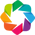

In [257]:
hv.extension('bokeh')

In [102]:
phases=pd.read_excel("phases.xlsx")

In [103]:
phases

Source                      Target  Value
0  Ocurrence 0.05                        Lost   1802
1  Ocurrence 0.05                >= 4 aa 0.05   2368
2  Ocurrence 0.10                        Lost   1987
3  Ocurrence 0.10                >= 4 aa 0.10     47
4    >= 4 aa 0.05  Non-small cell lung cancer   2071
5    >= 4 aa 0.05                        Lost    297
6    >= 4 aa 0.10  Non-small cell lung cancer     46
7    >= 4 aa 0.10                        Lost      1

In [256]:
hv.Sankey(phases)

:Sankey   [Source,Target]   (Value)

In [105]:
from holoviews.plotting.util import process_cmap
cmap_list = process_cmap("glasbey_light")

In [157]:
cmap = {
    "Ocurrence 0.05": cmap_list[3], 
    "Ocurrence 0.10": cmap_list[122],
    "Lost": cmap_list[255],
    ">= 4 aa 0.05": cmap_list[69],
    ">= 4 aa 0.10": cmap_list[102],
    "Non-small cell lung cancer": cmap_list[5],
    
}


In [158]:
sankey1 = hv.Sankey(phases, kdims=["Source", "Target"], vdims=["Value"])

sankey1.opts(cmap=cmap, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [ ]:
## other types of cancer

In [30]:
prot_by_cancer_01=pd.read_excel("ProtByPatternCanc01_summary.xlsx")

In [202]:
# Función para obtener los identificadores únicos manteniendo el id completo
def obtener_ids_unicos_manteniendo_id_completo(row):
    ids = re.findall(r"'(.*?)'", row)
    return list(set(ids))

In [70]:
prot_by_cancer_01['ids_unicos'] = prot_by_cancer_01['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [71]:
prot_by_cancer_01

Unnamed: 0   pattern                                           proteins  \
0            0  CEGCKGFF  [['P22736', 283], ['Q07869', 118], ['Q03181', ...   
1            1     CQYCR  [['P10588', 107], ['Q07869', 152], ['Q03181', ...   
2            2     FFKRT  [['O95718', 125], ['O00482', 108], ['P22736', ...   
3            3      ADLR  [['Q93084', 160], ['P13639', 797], ['P35575', ...   
4            4      AGLA  [['P01019', 27], ['P30556', 155], ['Q13796', 7...   
5            5      AKLL  [['P78325', 640], ['O95782', 905], ['Q01484', ...   
6            6      AVAG  [['Q99758', 498], ['P05141', 221], ['P13569', ...   
7            7      AVQE  [['P21926', 80], ['Q92985', 279], ['P49959', 4...   
8            8      DTLS  [['Q13085', 56], ['P02771', 292], ['P50851', 9...   
9            9      EAEK  [['P25054', 1551], ['Q99728', 220], ['P20248',...   
10          10      EAVE  [['P51587', 2225], ['P50851', 2464], ['P43681'...   
11          11      EAVQ  [['O00213', 647], ['Q03001', 1835], ['P01040',...   
12          12      EEED  [['Q99758', 503], ['P62736', 2], ['O00213', 15...   
13          13      EEEE  [['Q15109', 379], ['P31749', 113], ['Q9UM73', ...   
14          14      EHGI  [['P62736', 73], ['P60709', 71], ['P25445', 14...   
15          15      EKEK  [['Q01484', 2029], ['P25054', 151], ['Q13490',...   
16          16      ELLK  [['Q13315', 967], ['Q13535', 274], ['Q03001', ...   
17          17      ELLQ  [['Q9UKV5', 587], ['P25054', 476], ['P27695', ...   
18          18      EMLE  [['Q13535', 487], ['P49454', 2878], ['Q9NYC9',...   
19          19      GAGK  [['O95477', 935], ['Q99758', 568], ['P78363', ...   
20          20      GAIL  [['Q08722', 192], ['P35790', 148], ['Q9UNI1', ...   
21          21      GDGV  [['P62736', 157], ['P60709', 155], ['Q93084', ...   
22          22      GGGG  [['Q13085', 314], ['O43707', 22], ['Q9UM73', 8...   
23          23      GLFE  [['P09923', 285], ['Q01484', 2008], ['P02489',...   
24          24      GRFA  [['P19022', 428], ['Q05639', 421], ['Q14517', ...   
25          25      HYGV  [['P10588', 66], ['P03372', 195], ['Q92731', 1...   
26          26      KEEE  [['Q99758', 502], ['Q01484', 3059], ['P98170',...   
27          27      KKEV  [['P09874', 432], ['P31749', 181], ['Q13315', ...   
28          28      KRTI  [['Q05639', 35], ['O95718', 127], ['Q06830', 1...   
29          29      LGGG  [['P00519', 247], ['P22303', 24], ['P31749', 3...   
30          30      LLAT  [['P13686', 226], ['P09874', 185], ['P50052', ...   
31          31      LPLL  [['Q99758', 30], ['Q13085', 893], ['Q9UM73', 9...   
32          32      LQAL  [['P13686', 9], ['P35869', 118], ['P03971', 22...   
33          33      LRAG  [['Q03154', 166], ['O95782', 562], ['Q93088', ...   
34          34      LRSI  [['P11310', 11], ['P39880', 622], ['Q01094', 2...   
35          35      LTEL  [['Q99758', 1344], ['Q13085', 1062], ['P15309'...   
36          36      NDPV  [['P24043', 3060], ['P42702', 992], ['Q02962',...   
37          37      PSPP  [['Q13085', 1622], ['O00499', 296], ['P48023',...   
38          38      QACR  [['Q93084', 667], ['P42575', 317], ['P55210', ...   
39          39      QKCL  [['O00213', 658], ['O00482', 143], ['P22736', ...   
40          40      REIV  [['P62736', 207], ['P60709', 205], ['Q13796', ...   
41          41      RVLT  [['O95477', 605], ['Q16610', 429], ['P19447', ...   
42          42      SPAL  [['Q15911', 3344], ['P35670', 1271], ['Q08345'...   
43          43      VAIL  [['O95782', 427], ['Q01484', 178], ['Q99437', ...   
44          44      VEEA  [['P52565', 161], ['P35670', 902], ['Q13535', ...   
45          45      VVEP  [['Q15109', 240], ['P35869', 630], ['O15111', ...   
46          46      WTYE  [['P35475', 578], ['P00403', 105], ['P08922', ...   

                                           desease_id  \
0   [['C0006142', 'C0007102', 'C0346647'], ['C0006...   
1   [['C0006142', 'C0007102'], ['C0006142', 'C0007...   
2   [['C0006142', 'C0007102', 'C0346647'

In [75]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_cancer_01.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)

expanded_df = pd.DataFrame(expanded_rows)

In [76]:
expanded_df

Unnamed: 0   pattern                                           proteins  \
0            0  CEGCKGFF  [['P22736', 283], ['Q07869', 118], ['Q03181', ...   
0            0  CEGCKGFF  [['P22736', 283], ['Q07869', 118], ['Q03181', ...   
0            0  CEGCKGFF  [['P22736', 283], ['Q07869', 118], ['Q03181', ...   
1            1     CQYCR  [['P10588', 107], ['Q07869', 152], ['Q03181', ...   
1            1     CQYCR  [['P10588', 107], ['Q07869', 152], ['Q03181', ...   
..         ...       ...                                                ...   
45          45      VVEP  [['Q15109', 240], ['P35869', 630], ['O15111', ...   
46          46      WTYE  [['P35475', 578], ['P00403', 105], ['P08922', ...   
46          46      WTYE  [['P35475', 578], ['P00403', 105], ['P08922', ...   
46          46      WTYE  [['P35475', 578], ['P00403', 105], ['P08922', ...   
46          46      WTYE  [['P35475', 578], ['P00403', 105], ['P08922', ...   

                                           desease_id  \
0   [['C0006142', 'C0007102', 'C0346647'], ['C0006...   
0   [['C0006142', 'C0007102', 'C0346647'], ['C0006...   
0   [['C0006142', 'C0007102', 'C0346647'], ['C0006...   
1   [['C0006142', 'C0007102'], ['C0006142', 'C0007...   
1   [['C0006142', 'C0007102'], ['C0006142', 'C0007...   
..                                                ...   
45  [['C0006142', 'C0007102'], ['C0006142', 'C0007...   
46  [['C0006142'], ['C0006142', 'C0007102', 'C0346...   
46  [['C0006142'], ['C0006142', 'C0007102', 'C0346...   
46  [['C0006142'], ['C0006142', 'C0007102', 'C0346...   
46  [['C0006142'], ['C0006142', 'C0007102', 'C0346...   

                                        protein_names  \
0   [['NR4A1_HUMAN'], ['PPARA_HUMAN'], ['PPARD_HUM...   
0   [['NR4A1_HUMAN'], ['PPARA_HUMAN'], ['PPARD_HUM...   
0   [['NR4A1_HUMAN'], ['PPARA_HUMAN'], ['PPARD_HUM...   
1   [['N/A'], ['PPARA_HUMAN'], ['PPARD_HUMAN'], ['...   
1   [['N/A'], ['PPARA_HUMAN'], ['PPARD_HUMAN'], ['...   
..                                                ...   
45  [['RAGE_HUMAN'], ['N/A'], ['IKKA_HUMAN'], ['CO...   
46  [['IDUA_HUMAN'], ['COX2_HUMAN'], ['N/A'], ['TR...   
46  [['IDUA_HUMAN'], ['COX2_HUMAN'], ['N/A'], ['TR...   
46  [['IDUA_HUMAN'], ['COX2_HUMAN'], ['N/A'], ['TR...   
46  [['IDUA_HUMAN'], ['COX2_HUMAN'], ['N/A'], ['TR...   

                                       proteins_treat  \
0   {'O75469': [57], 'P10276': [104], 'P19793': [1...   
0   {'O75469': [57], 'P10276': [104], 'P19793': [1...   
0   {'O75469': [57], 'P10276': [104], 'P19793': [1...   
1   {'P10276': [139], 'P19793': [186], 'P28702': [...   
1   {'P10276': [139], 'P19793': [186], 'P28702': [...   
..                                                ...   
45  {'P07437': [178], 'P11474': [202], 'P42345': [...   
46  {'O15379': [306], 'P05023': [905], 'P50993': [...   
46  {'O15379': [306], 'P05023': [905], 'P50993': [...   
46  {'O15379': [306], 'P05023': [905], 'P50993': [...   
46  {'O15379': [306], 'P05023': [905], 'P50993': [...   

                                          names_Treat  \
0   [['NR1I2_HUMAN'], ['RARA_HUMAN'], ['RXRA_HUMAN...   
0   [['NR1I2_HUMAN'], ['RARA_HUMAN'], ['RXRA_HUMAN...   
0   [['NR1I2_HUMAN'], ['RARA_HUMAN'], ['RXRA_HUMAN...   
1   [['RARA_HUMAN'], ['RXRA_HUMAN'], ['RXRB_HUMAN'...   
1   [['RARA_HUMAN'], ['RXRA_HUMAN'], ['RXRB_HUMAN'...   
..                                                ...   
45  [['TBB5_HUMAN'], ['ERR1_HUMAN'], ['MTOR_HUMAN'...   
46  [['HDAC3_HUMAN'], ['AT1A1_HUMAN'], ['N/A'], ['...   
46  [['HDAC3_HUMAN'], ['AT1A1_HUMAN'], ['N/A'], ['...   
46  [['HDAC3_HUMAN'], ['AT1A1_HUMAN'], ['N/A'], ['...   
46  [['HDAC3_HUMAN'], ['AT1A1_HUMAN'], ['N/A'], ['...   

                                  ids_unicos name_disease  
0             [C0006142, C0346647, C0007102]     C0006142  
0             [C0006142, C0346647, C0007102]     C0346647  
0             [C0006142, C0346647, C0007102]     C0007102  
1                       [C0006142, C0007102]     C0006142  
1              

In [77]:
value_counts = expanded_df['name_disease'].value_counts().reset_index()

In [78]:
value_counts
# breast cancer, colon, pancreas, head_neck (este es el orden segun aparecen)

name_disease  count
0     C0006142     47
1     C0007102     47
2     C0346647     46
3     C0010606     38

In [5]:
prot_by_cancer_005 = pd.read_excel("ProtByPatternCanc005_summary.xlsx")

In [81]:
prot_by_cancer_005['ids_unicos'] = prot_by_cancer_005['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [82]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_cancer_005.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)

expanded_df_005 = pd.DataFrame(expanded_rows)

In [83]:
value_counts_005 = expanded_df_005['name_disease'].value_counts().reset_index()

In [84]:
value_counts_005
# breast cancer, colon, pancreas, head_neck (este es el orden segun aparecen)


name_disease  count
0     C0006142   2193
1     C0007102   2138
2     C0346647   2023
3     C0010606   1589

In [159]:
phases_cancer =pd.read_excel("phases_cancers.xlsx")

In [160]:
phases_cancer

Source                    Target  Value
0             Ocurrence 0.05                      Lost   1802
1             Ocurrence 0.05              >= 4 aa 0.05   2368
2             Ocurrence 0.10                      Lost   1987
3             Ocurrence 0.10              >= 4 aa 0.10     47
4               >= 4 aa 0.05  other types cancer_ 0.05   2200
5               >= 4 aa 0.05                      Lost    168
6               >= 4 aa 0.10   other types cancer_0.10     47
7               >= 4 aa 0.10                      Lost      0
8   other types cancer_ 0.05             Breast cancer   2193
9   other types cancer_ 0.05              Colon cancer   2138
10  other types cancer_ 0.05           Pancreas cancer   2023
11  other types cancer_ 0.05          Head_neck cancer   1589
12   other types cancer_0.10             Breast cancer     47
13   other types cancer_0.10              Colon cancer     47
14   other types cancer_0.10           Pancreas cancer     46
15   other types cancer_0.10          Head_neck cancer     38

In [258]:
hv.Sankey(phases_cancer)

:Sankey   [Source,Target]   (Value)

In [197]:
cmapone = { 
    "Ocurrence 0.10": cmap_list[122],
    "Lost": cmap_list[255],
    ">= 4 aa 0.10": cmap_list[102],
    "other types cancer_ 0.10": cmap_list[29],
    "Breast cancer": cmap_list[6],
    "Colon cancer": cmap_list[7],
    "Pancreas cancer": cmap_list[9],
    "Head_neck cancer": cmap_list[14],
    "Ocurrence 0.05": cmap_list[3], 
    ">= 4 aa 0.05": cmap_list[69],
    "other types cancer_ 0.05": cmap_list[28]
      
    
}


In [198]:
sankey1 = hv.Sankey(phases_cancer, kdims=["Source", "Target"], vdims=["Value"])

sankey1.opts(cmap=cmapone, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [195]:
phases_cancer_005 =pd.read_excel("phases_cancers.xlsx", sheet_name=1)

In [164]:
phases_cancer_005

Source                    Target  Value
0            Ocurrence 0.05                      Lost   1802
1            Ocurrence 0.05              >= 4 aa 0.05   2368
2              >= 4 aa 0.05  other types cancer_ 0.05   2200
3              >= 4 aa 0.05                      Lost    168
4  other types cancer_ 0.05             Breast cancer   2193
5  other types cancer_ 0.05              Colon cancer   2138
6  other types cancer_ 0.05           Pancreas cancer   2023
7  other types cancer_ 0.05          Head_neck cancer   1589

In [182]:
cmapdos = {
    "Ocurrence 0.05": cmap_list[3], 
    "Lost": cmap_list[255],
    ">= 4 aa 0.05": cmap_list[69],
    "other types cancer_ 0.05": cmap_list[28],
    "Breast cancer": cmap_list[6],
    "Colon cancer": cmap_list[7],
    "Pancreas cancer": cmap_list[9],
    "Head_neck cancer": cmap_list[14]
    
}


In [183]:
sankey2 = hv.Sankey(phases_cancer_005, kdims=["Source", "Target"], vdims=["Value"])

sankey2.opts(cmap=cmapdos, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [186]:
phases_cancer_010 =pd.read_excel("phases_cancers.xlsx", sheet_name=2)

In [189]:
phases_cancer_010

Source                   Target  Value
0           Ocurrence 0.10                     Lost   1987
1           Ocurrence 0.10             >= 4 aa 0.10     47
2             >= 4 aa 0.10  other types cancer_0.10     47
3             >= 4 aa 0.10                     Lost      0
4  other types cancer_0.10            Breast cancer     47
5  other types cancer_0.10             Colon cancer     47
6  other types cancer_0.10          Pancreas cancer     46
7  other types cancer_0.10         Head_neck cancer     38

In [192]:
cmaptres = { 
    "Ocurrence 0.10": cmap_list[122],
    "Lost": cmap_list[255],
    ">= 4 aa 0.10": cmap_list[102],
    "other types cancer_0.10": cmap_list[29],
    "Breast cancer": cmap_list[6],
    "Colon cancer": cmap_list[7],
    "Pancreas cancer": cmap_list[9],
    "Head_neck cancer": cmap_list[14]
    
    
}


In [193]:
sankey3 = hv.Sankey(phases_cancer_010, kdims=["Source", "Target"], vdims=["Value"])

sankey3.opts(cmap=cmaptres, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [ ]:
### Immune 

In [199]:
prot_by_immune_01 = pd.read_excel("ProtByPatternImmun01_summary.xlsx")

In [203]:
prot_by_immune_01['ids_unicos'] = prot_by_immune_01['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [209]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_immune_01.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)
        
expanded_df_010_imm = pd.DataFrame(expanded_rows)

In [211]:
value_counts = expanded_df_010_imm['name_disease'].value_counts().reset_index()

In [212]:
value_counts
# Rheumatoid Arthritis,Diabetes Mellitus, Insulin-Dependent, Multiple sclerosis, Lupus

name_disease  count
0     C0003873     47
1     C0011854     45
2     C0026769     45
3     C0024141     43

In [213]:
prot_by_immune_005 = pd.read_excel("ProtByPatternImmun005_summary.xlsx")

In [214]:
prot_by_immune_005['ids_unicos'] = prot_by_immune_005['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [217]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_immune_005.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)
        
expanded_df_005_imm = pd.DataFrame(expanded_rows)

In [218]:
value_counts = expanded_df_005_imm['name_disease'].value_counts().reset_index()

In [219]:
value_counts
##  Rheumatoid Arthritis, Lupus, Diabetes Mellitus, Insulin-Dependent, Multiple sclerosis 

name_disease  count
0     C0003873   2038
1     C0024141   1930
2     C0011854   1904
3     C0026769   1877

In [222]:
phases_immune =pd.read_excel("phases_immune.xlsx")

In [223]:
phases_immune

Source                Target  Value
0         Ocurrence 0.05                  Lost   1802
1         Ocurrence 0.05          >= 4 aa 0.05   2368
2         Ocurrence 0.10                  Lost   1987
3         Ocurrence 0.10          >= 4 aa 0.10     47
4           >= 4 aa 0.05  immune diseases_0.05   2131
5           >= 4 aa 0.05                  Lost    237
6           >= 4 aa 0.10  immune diseases_0.10     47
7   immune diseases_0.05                    RA   2038
8   immune diseases_0.05                    LU   1930
9   immune diseases_0.05                    DB   1904
10  immune diseases_0.05                    MS   1877
11  immune diseases_0.10                    RA     47
12  immune diseases_0.10                    LU     43
13  immune diseases_0.10                    DB     45
14  immune diseases_0.10                    MS     45

In [259]:
hv.Sankey(phases_immune)

:Sankey   [Source,Target]   (Value)

In [239]:
cmapcuatro = { 
    "Ocurrence 0.10": cmap_list[122],
    "Lost": cmap_list[255],
    ">= 4 aa 0.10": cmap_list[102],
    "immune diseases_0.10": cmap_list[38],
     "Ocurrence 0.05": cmap_list[3], 
    ">= 4 aa 0.05": cmap_list[69],
    "immune diseases_0.05": cmap_list[40],
    "RA": cmap_list[20],
    "MS": cmap_list[21],
    "LU": cmap_list[22],
    "DB": cmap_list[23]
   
    
    
}


In [240]:
sankey4 = hv.Sankey(phases_immune, kdims=["Source", "Target"], vdims=["Value"])

sankey4.opts(cmap=cmapcuatro, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [ ]:
## Rare 

In [241]:
prot_by_rare_01 = pd.read_excel("ProtByPatternRare01_summary.xlsx")

In [242]:
prot_by_rare_01['ids_unicos'] = prot_by_rare_01['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [243]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_rare_01.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)
        
expanded_df_010_rare = pd.DataFrame(expanded_rows)

In [244]:
value_counts = expanded_df_010_rare['name_disease'].value_counts().reset_index()

In [245]:
value_counts
# X-Linked Emery-Dreifuss Muscular Dystrophy, Acromegaloid facial, Lown-Ganong-Levine, DERMODISTORTIVE URTICARIA

name_disease  count
0     C0751337     27
1     C0796280      3
2     C0024054      1
3     C1852146      1

In [246]:
prot_by_rare_005 = pd.read_excel("ProtByPatternRare005_summary.xlsx")

In [247]:
prot_by_rare_005['ids_unicos'] = prot_by_rare_005['desease_id'].apply(obtener_ids_unicos_manteniendo_id_completo)

In [248]:
# Crear un nuevo DataFrame con filas expandidas
expanded_rows = []
for _, row in prot_by_rare_005.iterrows():
    for id_unico in row['ids_unicos']:
        new_row = row.copy()
        new_row['name_disease'] = id_unico
        expanded_rows.append(new_row)
        
expanded_df_005_rare = pd.DataFrame(expanded_rows)

In [249]:
value_counts = expanded_df_005_rare['name_disease'].value_counts().reset_index()

In [250]:
value_counts
#X-Linked Emery-Dreifuss Muscular Dystrophy, Acromegaloid facial,urticaria, lown, neonatal, locked

name_disease  count
0     C0751337   1090
1     C0796280     56
2     C1852146     25
3     C0024054     17
4     C0268059     12
5     C0023944      9

In [262]:
phases_rare =pd.read_excel("phases_rare.xlsx")

In [263]:
phases_rare

Source              Target  Value
0       Ocurrence 0.05                Lost   1802
1       Ocurrence 0.05        >= 4 aa 0.05   2368
2       Ocurrence 0.10                Lost   1987
3       Ocurrence 0.10        >= 4 aa 0.10     47
4         >= 4 aa 0.05  rare diseases_0.05   1121
5         >= 4 aa 0.05                Lost   1247
6         >= 4 aa 0.10  rare diseases_0.10     28
7         >= 4 aa 0.10                Lost     19
8   rare diseases_0.05            X-Linked   1090
9   rare diseases_0.05            Acromega     56
10  rare diseases_0.05           urticaria     25
11  rare diseases_0.05                Lown     17
12  rare diseases_0.05            Neonatal     12
13  rare diseases_0.05              Locked      9
14  rare diseases_0.10            X-Linked     27
15  rare diseases_0.10            Acromega      3
16  rare diseases_0.10                Lown      1
17  rare diseases_0.10           urticaria      1
18  rare diseases_0.10            Neonatal      0
19  rare diseases_0.10              Locked      0

In [277]:
cmapcinco = { 
    "Ocurrence 0.10": cmap_list[122],
    "Lost": cmap_list[255],
    ">= 4 aa 0.10": cmap_list[102],
    "rare diseases_0.10": cmap_list[49],
     "Ocurrence 0.05": cmap_list[3], 
    ">= 4 aa 0.05": cmap_list[69],
    "rare diseases_0.05": cmap_list[42],
    "X-Linked": cmap_list[70],
    "Acromega": cmap_list[61],
    "urticaria": cmap_list[62],
    "Lown": cmap_list[103],    
    "Neonatal": cmap_list[64],
    "Locked": cmap_list[75]
    
}


In [278]:
sankey5 = hv.Sankey(phases_rare, kdims=["Source", "Target"], vdims=["Value"])

sankey5.opts(cmap=cmapcinco, label_text_font_size='0pt',
                                 edge_color='Target', edge_line_width=0.3,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=1500, height=800, bgcolor="white")

:Sankey   [Source,Target]   (Value)

In [279]:
hv.Sankey(phases_rare)

:Sankey   [Source,Target]   (Value)